In [2]:
# Import the usual libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import scikit-learn machine learning model
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
# Import scikit-learn metrics and preprocessing libraries
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [3]:
address = '/Users/mattkukulich/Documents/BettingAI/nfl_gamelogs2022-2024.csv'
nfl_df = pd.read_csv(address)
print(nfl_df)

      Season  Week Team  Day          Date Unnamed: 3 Unnamed: 4   OT  \
0       2022     1  CRD  Sun  September 11   boxscore          L  NaN   
1       2022     2  CRD  Sun  September 18   boxscore          W   OT   
2       2022     3  CRD  Sun  September 25   boxscore          L  NaN   
3       2022     4  CRD  Sun     October 2   boxscore          W  NaN   
4       2022     5  CRD  Sun     October 9   boxscore          L  NaN   
...      ...   ...  ...  ...           ...        ...        ...  ...   
1625    2024    13  WAS  Sun    December 1   boxscore          W  NaN   
1626    2024    15  WAS  Sun   December 15   boxscore          W  NaN   
1627    2024    16  WAS  Sun   December 22   boxscore          W  NaN   
1628    2024    17  WAS  Sun   December 29   boxscore          W   OT   
1629    2024    18  WAS  Sun     January 5   boxscore          W  NaN   

     Unnamed: 6                  Opp  ...  FGA.1  XPM.1  XPA.1  Pnt.1  \
0           NaN   Kansas City Chiefs  ...      1  

In [4]:
nfl_df.columns = ['Season', 'Week', 'Team', 'Day', 'Date', 'DeleteBoxscore', 'Result', 'DeleteOT', 'Home/Away', 'Opponent', 'TeamScore', 'OppScore',
                  'PassCmp', 'PassAtt', 'PassYds', 'PassTD', 'Int', 'SacksTaken', 'SackYdsTaken', 'PassY/A', 'NY/A', 'PassCmp%', 'PassRate',
                  'RushAtt', 'RushYds', 'RushY/A', 'RushTD', 'FGM', 'FGA', 'XPM', 'XPA', 'Punts', 'PuntYds', '3DConv', '3DAtt', '4DConv',
                  '4DAtt', 'ToP', 'DeleteWeek', 'DeleteDay', 'DeleteDate', 'DeleteBoxscore2', 'DeleteResult', 'DeleteOT2', 'DeleteH/A', 'DeleteOpponent', 'DeleteTeamScore',
                  'DeleteOppScore', 'PassCmpAlw', 'PassAttAlw', 'PassYdsAlw', 'PassTDAlw', 'DefInt', 'DefSacks', 'DefSackYds', 'PassY/AAlw', 'NY/AAlw', 'PassCmp%Alw',
                  'PassRateAlw', 'RushAttAlw', 'RushYdsAlw', 'RushY/AAlw', 'RushTDAlw', 'OppFGM', 'OppFGA', 'OppXPM', 'OppXPA', 'OppPunts', 'OppPuntYds', 'Opp3DConv',
                  'Opp3DAtt', 'Opp4DConv', 'Opp4DAtt', 'OppToP']
print(nfl_df)

      Season  Week Team  Day          Date DeleteBoxscore Result DeleteOT  \
0       2022     1  CRD  Sun  September 11       boxscore      L      NaN   
1       2022     2  CRD  Sun  September 18       boxscore      W       OT   
2       2022     3  CRD  Sun  September 25       boxscore      L      NaN   
3       2022     4  CRD  Sun     October 2       boxscore      W      NaN   
4       2022     5  CRD  Sun     October 9       boxscore      L      NaN   
...      ...   ...  ...  ...           ...            ...    ...      ...   
1625    2024    13  WAS  Sun    December 1       boxscore      W      NaN   
1626    2024    15  WAS  Sun   December 15       boxscore      W      NaN   
1627    2024    16  WAS  Sun   December 22       boxscore      W      NaN   
1628    2024    17  WAS  Sun   December 29       boxscore      W       OT   
1629    2024    18  WAS  Sun     January 5       boxscore      W      NaN   

     Home/Away             Opponent  ...  OppFGA  OppXPM  OppXPA  OppPunts 

In [5]:
# Drop columns that start with "Delete"
nfl_df = nfl_df.loc[:, ~nfl_df.columns.str.startswith('Delete')]
print(nfl_df.columns)
print(nfl_df)

Index(['Season', 'Week', 'Team', 'Day', 'Date', 'Result', 'Home/Away',
       'Opponent', 'TeamScore', 'OppScore', 'PassCmp', 'PassAtt', 'PassYds',
       'PassTD', 'Int', 'SacksTaken', 'SackYdsTaken', 'PassY/A', 'NY/A',
       'PassCmp%', 'PassRate', 'RushAtt', 'RushYds', 'RushY/A', 'RushTD',
       'FGM', 'FGA', 'XPM', 'XPA', 'Punts', 'PuntYds', '3DConv', '3DAtt',
       '4DConv', '4DAtt', 'ToP', 'PassCmpAlw', 'PassAttAlw', 'PassYdsAlw',
       'PassTDAlw', 'DefInt', 'DefSacks', 'DefSackYds', 'PassY/AAlw',
       'NY/AAlw', 'PassCmp%Alw', 'PassRateAlw', 'RushAttAlw', 'RushYdsAlw',
       'RushY/AAlw', 'RushTDAlw', 'OppFGM', 'OppFGA', 'OppXPM', 'OppXPA',
       'OppPunts', 'OppPuntYds', 'Opp3DConv', 'Opp3DAtt', 'Opp4DConv',
       'Opp4DAtt', 'OppToP'],
      dtype='object')
      Season  Week Team  Day          Date Result Home/Away  \
0       2022     1  CRD  Sun  September 11      L       NaN   
1       2022     2  CRD  Sun  September 18      W         @   
2       2022     3  CRD 

In [6]:
# Replace "@" with "Away" and NaN with "Home"
nfl_df["Home/Away"] = nfl_df["Home/Away"].replace("@", "Away").fillna("Home")

# Verify the changes
print(nfl_df)


      Season  Week Team  Day          Date Result Home/Away  \
0       2022     1  CRD  Sun  September 11      L      Home   
1       2022     2  CRD  Sun  September 18      W      Away   
2       2022     3  CRD  Sun  September 25      L      Home   
3       2022     4  CRD  Sun     October 2      W      Away   
4       2022     5  CRD  Sun     October 9      L      Home   
...      ...   ...  ...  ...           ...    ...       ...   
1625    2024    13  WAS  Sun    December 1      W      Home   
1626    2024    15  WAS  Sun   December 15      W      Away   
1627    2024    16  WAS  Sun   December 22      W      Home   
1628    2024    17  WAS  Sun   December 29      W      Home   
1629    2024    18  WAS  Sun     January 5      W      Away   

                 Opponent  TeamScore  OppScore  ...  OppFGA  OppXPM  OppXPA  \
0      Kansas City Chiefs         21        44  ...       1       5       6   
1       Las Vegas Raiders         29        23  ...       3       2       2   
2     

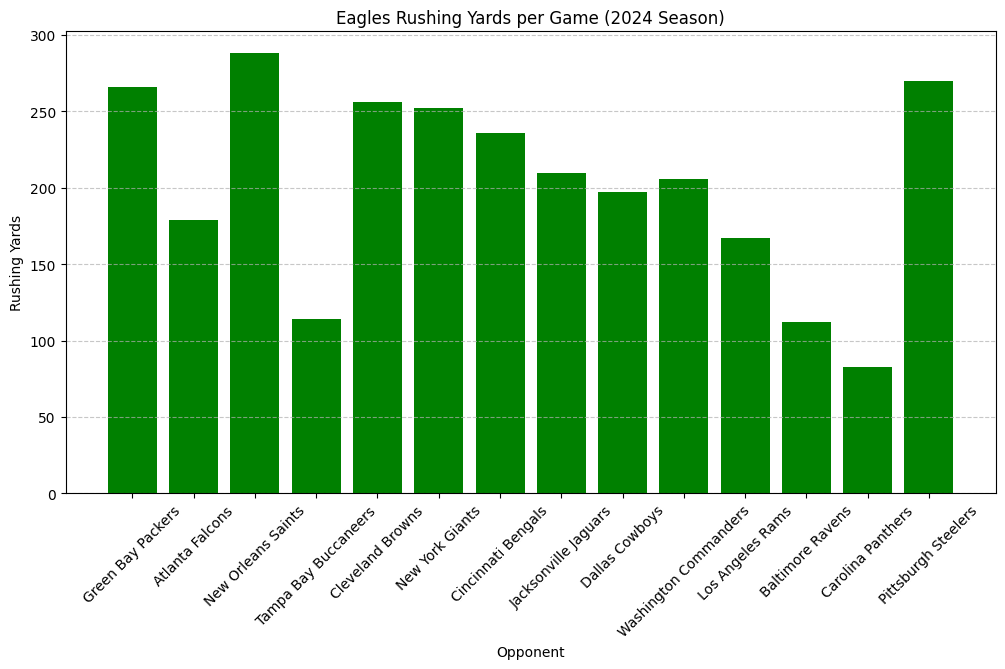

In [7]:

# Filter data for Eagles in the 2024 season
eagles_df = nfl_df[(nfl_df["Team"] == "PHI") & (nfl_df["Season"] == 2024)]

# Extract opponent names and rushing yards
opponents = eagles_df["Opponent"]
rushing_yards = eagles_df["PassYds"]

# Create the bar graph
plt.figure(figsize=(12, 6))
plt.bar(opponents, rushing_yards, color="green")

# Add labels and title
plt.xlabel("Opponent")
plt.ylabel("Rushing Yards")
plt.title("Eagles Rushing Yards per Game (2024 Season)")
plt.xticks(rotation=45)  # Rotate opponent names for better readability
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


In [8]:
nfl24_df = nfl_df[(nfl_df['Season'] == 2024)]
print(nfl24_df)

      Season  Week Team  Day          Date Result Home/Away  \
1086    2024     1  CRD  Sun   September 8      L      Away   
1087    2024     2  CRD  Sun  September 15      W      Home   
1088    2024     3  CRD  Sun  September 22      L      Home   
1089    2024     4  CRD  Sun  September 29      L      Home   
1090    2024     5  CRD  Sun     October 6      W      Away   
...      ...   ...  ...  ...           ...    ...       ...   
1625    2024    13  WAS  Sun    December 1      W      Home   
1626    2024    15  WAS  Sun   December 15      W      Away   
1627    2024    16  WAS  Sun   December 22      W      Home   
1628    2024    17  WAS  Sun   December 29      W      Home   
1629    2024    18  WAS  Sun     January 5      W      Away   

                   Opponent  TeamScore  OppScore  ...  OppFGA  OppXPM  OppXPA  \
1086          Buffalo Bills         28        34  ...       2       4       4   
1087       Los Angeles Rams         41        10  ...       1       1       1   
